In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
dfita = pd.read_csv('../data/pcm-dpc_COVID-19/dati-regioni/dpc-covid19-ita-regioni.csv')

In [3]:
dfita.head()

,data,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
0,2020-02-24 18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,5
1,2020-02-24 18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0
2,2020-02-24 18:00:00,ITA,4,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,1
3,2020-02-24 18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,1
4,2020-02-24 18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,10


In [4]:
dfita['data'] = pd.to_datetime(dfita['data'])

In [5]:
dfitapvt = dfita.pivot(columns='denominazione_regione', index='data', values='totale_casi')

In [6]:
top = dfitapvt.tail(1).iloc[0].sort_values(ascending=False).index[:8]

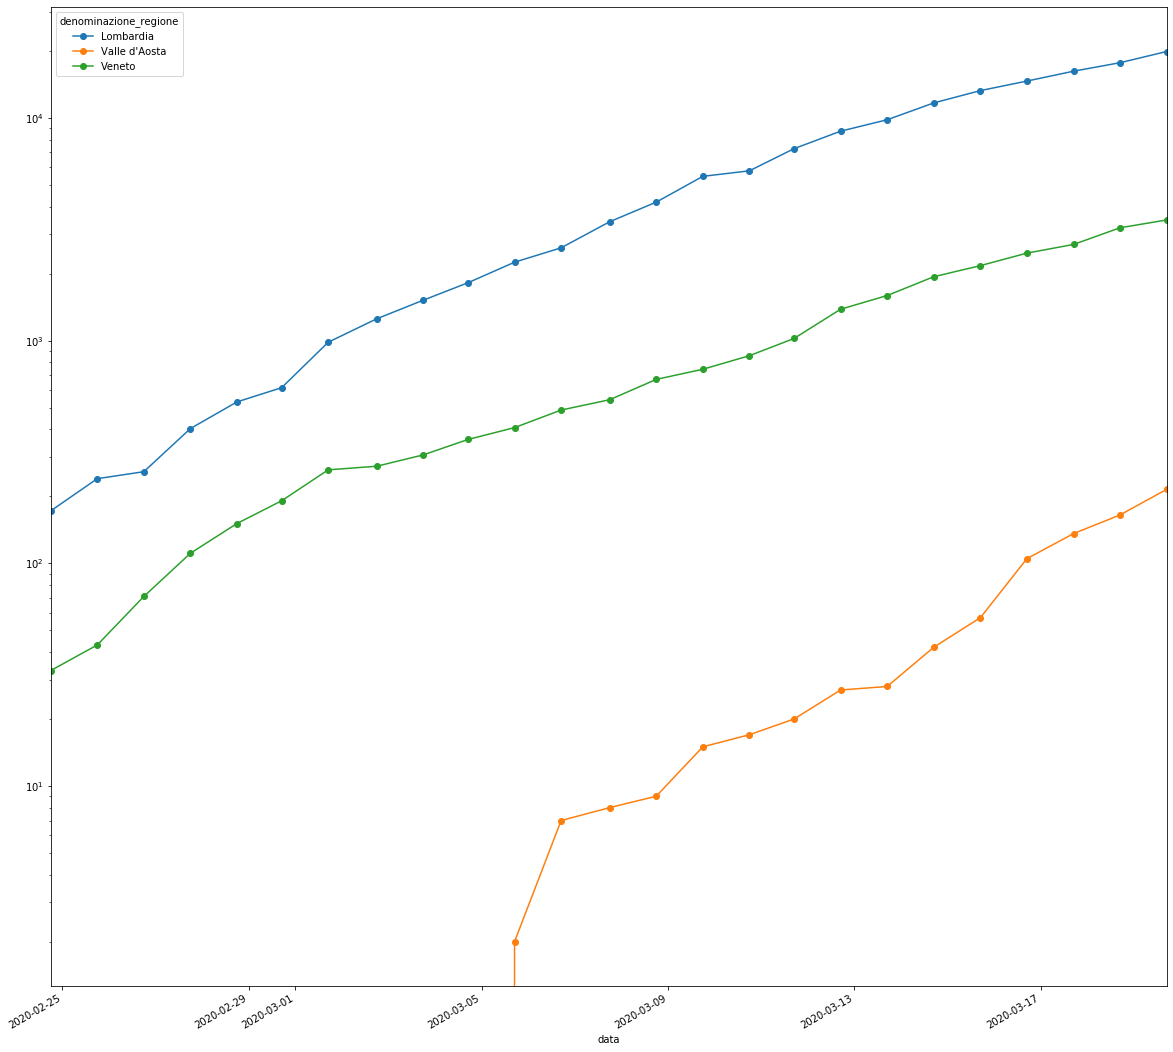

In [7]:
dfitapvt[['Lombardia', "Valle d'Aosta", "Veneto"]].plot(style='o-', logy=True, figsize=(20, 20))

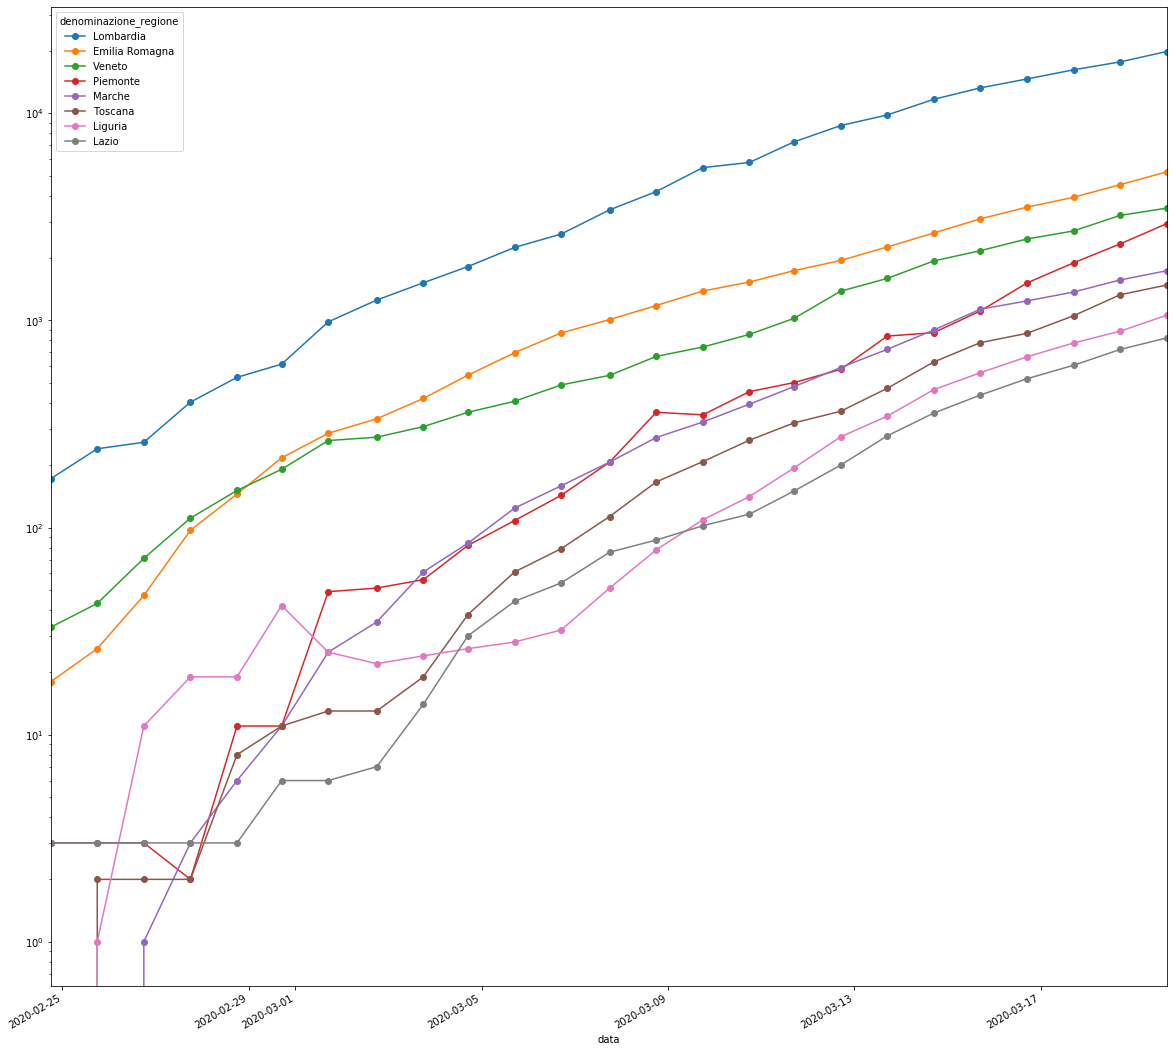

In [8]:
dfitapvt[top].plot(style='o-', logy=True, figsize=(20, 20))

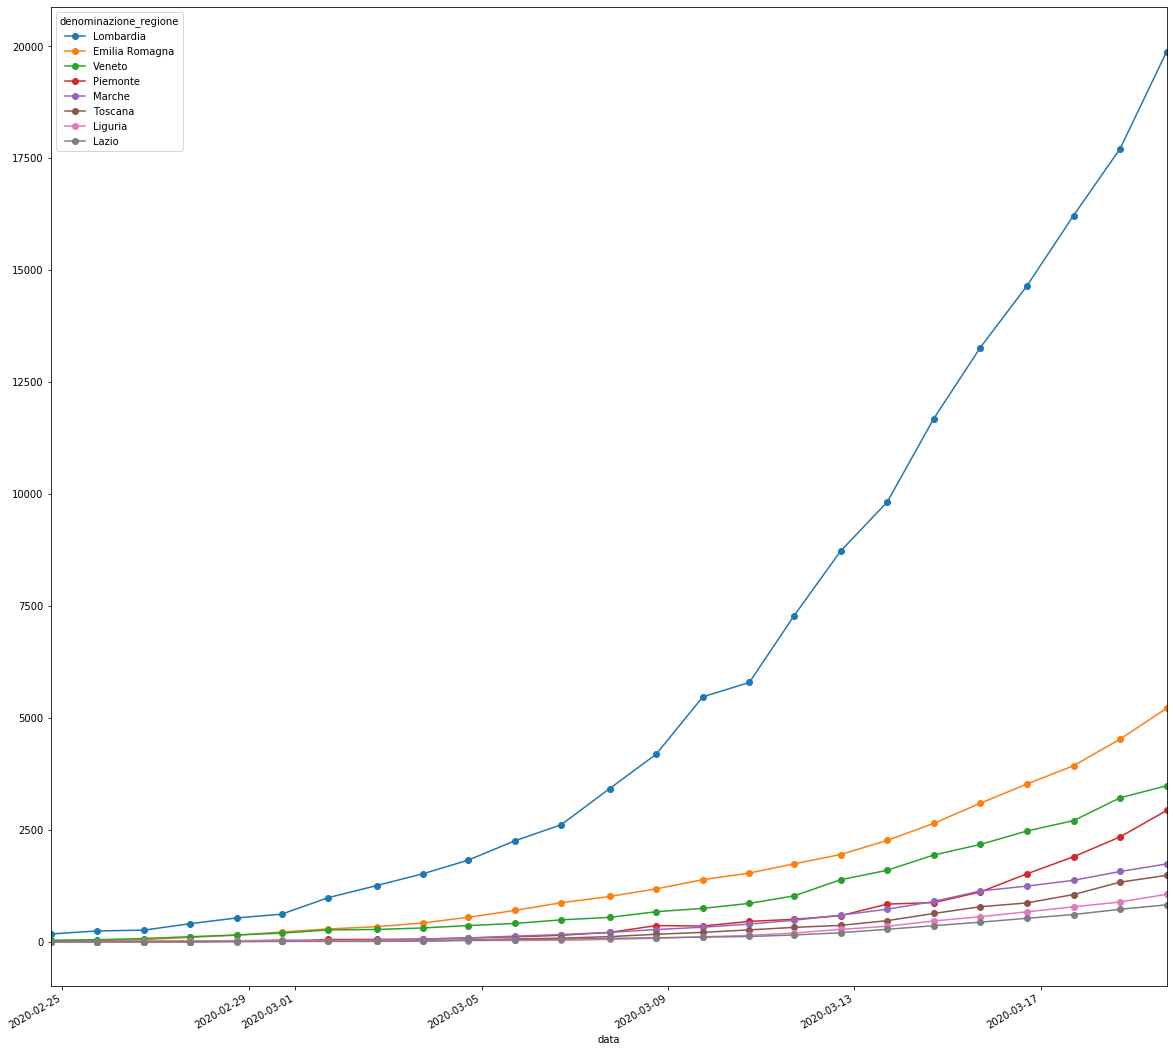

In [9]:
dfitapvt[top].plot(style='o-', figsize=(20, 20))

In [10]:
dfregioni = pd.read_html('https://www.tuttitalia.it/regioni/popolazione/')[0].drop('Unnamed: 0', axis=1).sort_values('Regione')

In [11]:
dfregioni.head()


,Regione,Popolazioneresidenti,Superficiekm²,Densitàabitanti/km²,NumeroComuni,NumeroProvince
13,Abruzzo,1.311.580,10.83184,121,305.0,4
17,Basilicata,562.869,10.07332,56,131.0,2
9,Calabria,1.947.131,15.22190,128,404.0,5
2,Campania,5.801.692,13.67095,424,550.0,5
5,Emilia-Romagna,4.459.477,22.45278,199,328.0,9


In [12]:
dfregioni['Regione'].values

array(['Abruzzo', 'Basilicata', 'Calabria', 'Campania', 'Emilia-Romagna',
       'Friuli Venezia Giulia', 'Lazio', 'Liguria', 'Lombardia', 'Marche',
       'Molise', 'Piemonte', 'Puglia', 'Sardegna', 'Sicilia', 'Toscana',
       'Totale', 'Trentino-Alto Adige', 'Umbria', "Valle d'Aosta",
       'Veneto'], dtype=object)

In [13]:
dfregioni = dfregioni.set_index('Regione')

In [14]:
dfitapvt.columns

Index(['Abruzzo', 'Basilicata', 'Calabria', 'Campania', 'Emilia Romagna',
       'Friuli Venezia Giulia', 'Lazio', 'Liguria', 'Lombardia', 'Marche',
       'Molise', 'P.A. Bolzano', 'P.A. Trento', 'Piemonte', 'Puglia',
       'Sardegna', 'Sicilia', 'Toscana', 'Umbria', 'Valle d'Aosta', 'Veneto'],
      dtype='object', name='denominazione_regione')

In [15]:
dfitapvtpc = dfitapvt.copy()

In [16]:
dfitapvtpc['Trentino-Alto Adige'] = dfitapvtpc[['P.A. Bolzano', 'P.A. Trento']].sum(axis=1)
dfitapvtpc['Emilia-Romagna'] = dfitapvtpc['Emilia Romagna'].copy()
dfitapvtpc = dfitapvtpc.drop(['P.A. Bolzano', 'P.A. Trento', 'Emilia Romagna'], axis=1).sort_index(axis=1)

In [17]:
len(dfitapvtpc.columns)

20

In [20]:
for c in dfitapvtpc.columns:
    dfitapvtpc[c] = dfitapvtpc[c] / float(dfregioni.loc[c, 'Popolazioneresidenti'].replace('.', ''))

In [21]:
top2 = dfitapvtpc.tail(1).iloc[0].sort_values(ascending=False).index[:8]

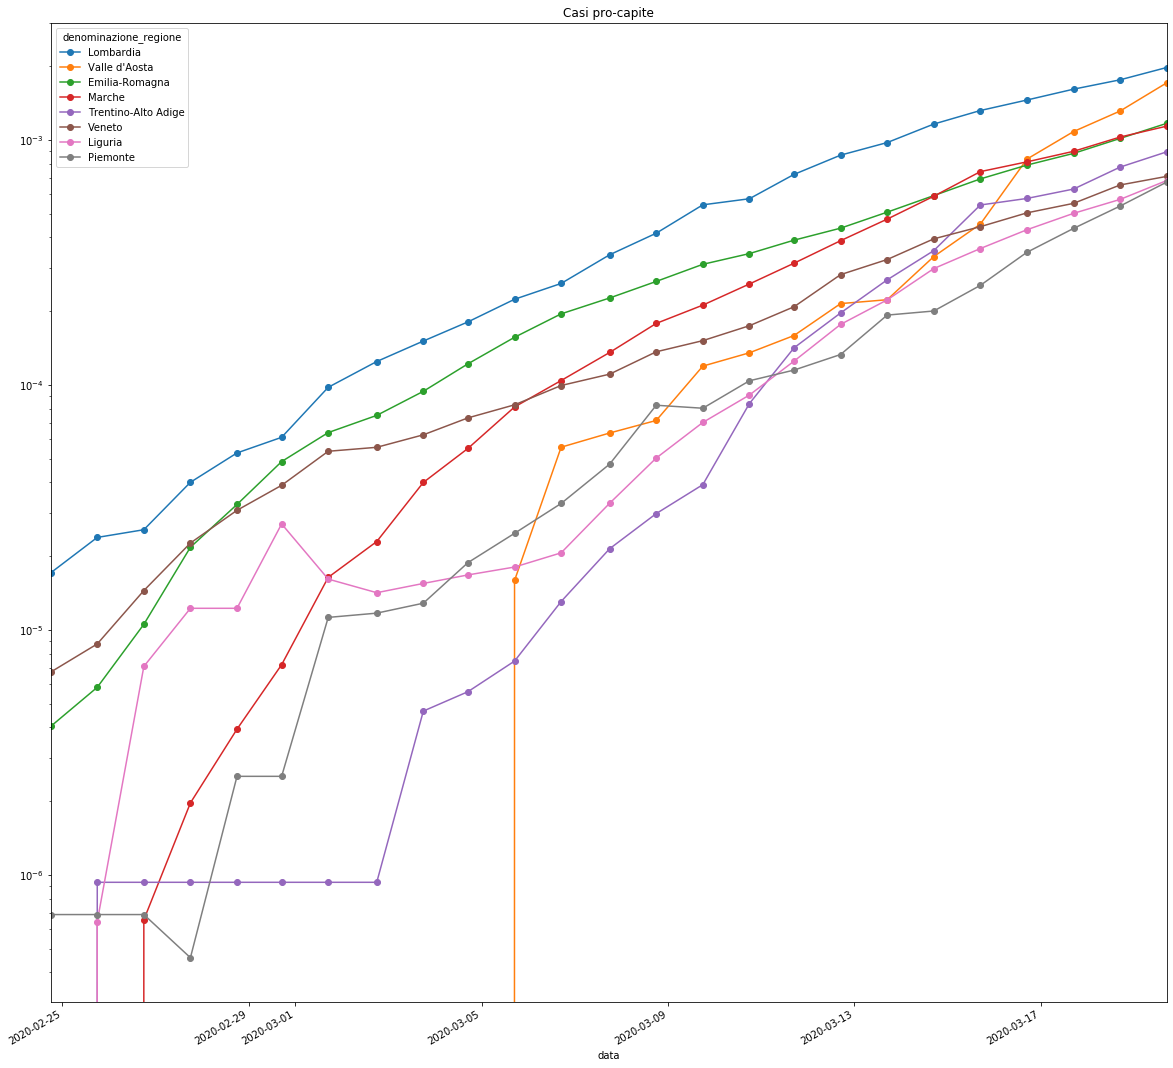

In [22]:
dfitapvtpc[top2].plot(style='o-', logy=True, figsize=(20, 20), title='Casi pro-capite')

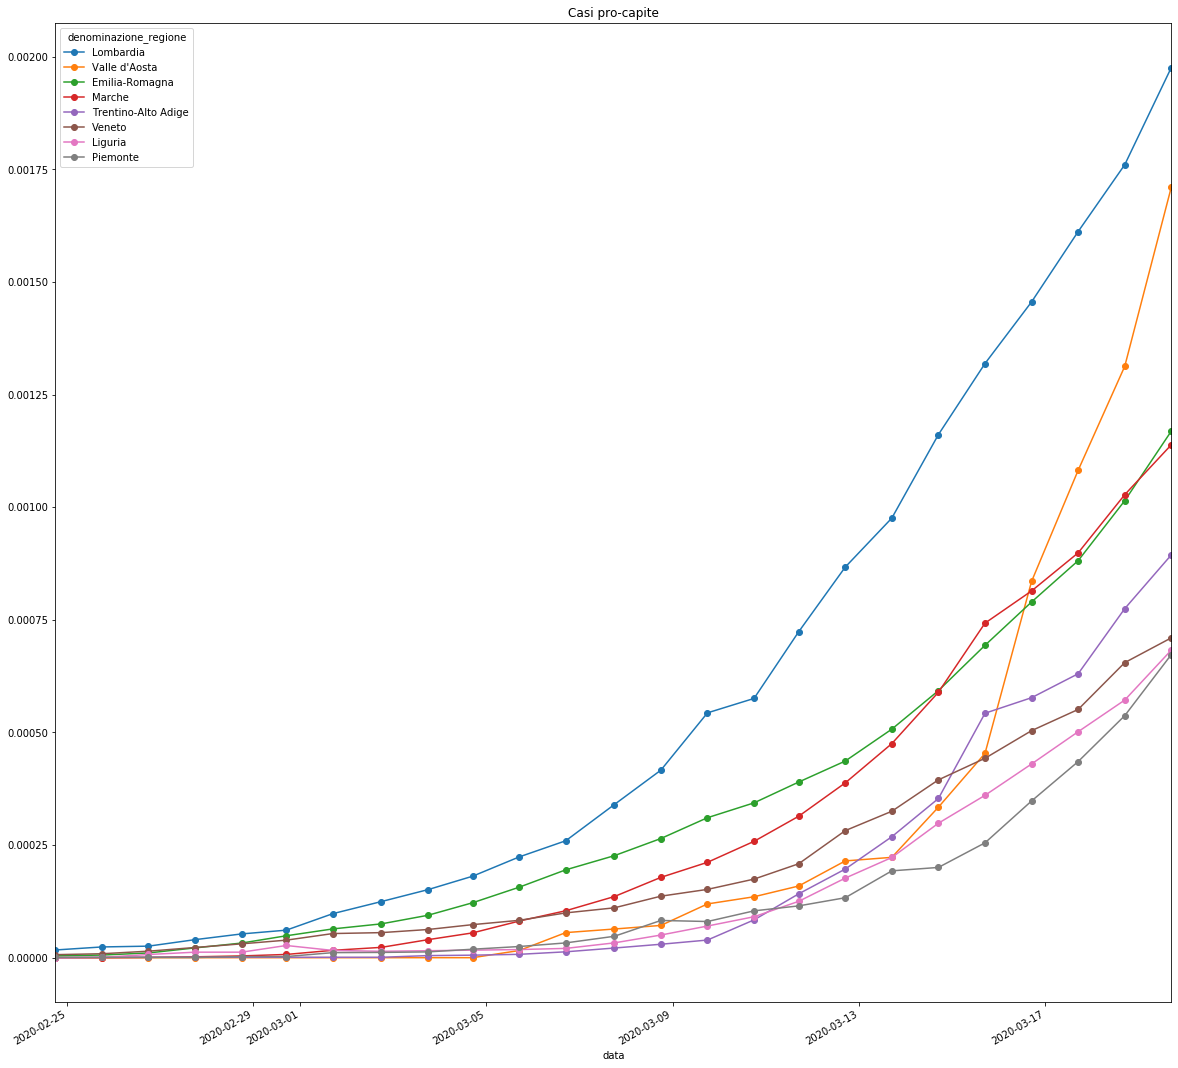

In [23]:
dfitapvtpc[top2].plot(style='o-', figsize=(20, 20), title='Casi pro-capite')

In [24]:
top

Index(['Lombardia', 'Emilia Romagna', 'Veneto', 'Piemonte', 'Marche',
       'Toscana', 'Liguria', 'Lazio'],
      dtype='object', name='denominazione_regione')

In [25]:
top2

Index(['Lombardia', 'Valle d'Aosta', 'Emilia-Romagna', 'Marche',
       'Trentino-Alto Adige', 'Veneto', 'Liguria', 'Piemonte'],
      dtype='object', name='denominazione_regione')